# Regression in Python

***

In [1]:
# Import packages.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up some x values.
x = np.arange(0.0, 10.1, 0.5)

In [3]:
# Let's havea look at x.
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

***

$$ y = 5 x + 2 $$

In [4]:
# Create y - note numpy's element-wise operations.
y = 5.0 * x + 2.0

In [5]:
# Look at y.
y

array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ,
       29.5, 32. , 34.5, 37. , 39.5, 42. , 44.5, 47. , 49.5, 52. ])

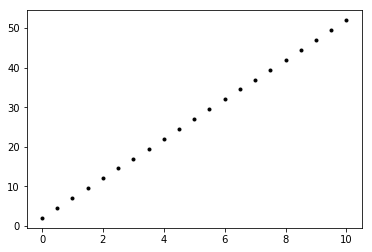

In [6]:
# Plot x versus y.
plt.plot(x, y, 'k.')

In [7]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([5., 2.])

***

$$ y = 3 x - 1 + \epsilon $$

In [8]:
# Create a y with noise.
y = 3.0 * x - 1.0 + np.random.normal(0.0, 1.0, len(x))

In [9]:
# Look at y.
y

array([-0.03492274, -0.51209049,  0.92835246,  2.6619292 ,  3.46920011,
        5.00165771,  6.97515482, 10.54792291, 11.20901151, 12.47803154,
       14.51366555, 15.43091182, 16.18200651, 18.74721871, 18.97610028,
       20.84076898, 22.54210887, 24.10339426, 24.65699743, 27.60231047,
       29.46541358])

In [10]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([ 3.03139204, -1.54814384])

In [11]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(3.031392040233785, -1.5481438439127706)

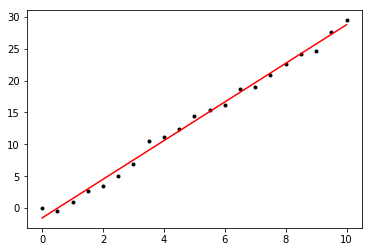

In [12]:
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

Note that we can easily calculate the best m and c ourselves.

In [13]:
# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

(3.031392040233786, -1.5481438439127757)

***

$$ y = 2 x^2 + 5x + 1 + \epsilon $$

In [14]:
# Create y from a polynomial in x.
y =  2.0 * x * x + 5.0 * x + 1.0 + np.random.normal(0.0, 1.0, len(x))

In [15]:
# Look at y.
y

array([  2.44216058,   5.22249784,   6.51326315,  13.65727713,
        18.64020004,  25.36916309,  34.93935727,  43.89125402,
        54.76842181,  63.98003794,  74.44606323,  88.95765836,
       104.91558366, 116.20114214, 134.7037222 , 150.9535893 ,
       171.11490775, 185.36997967, 208.56922239, 228.97376765,
       251.88705276])

In [16]:
# Blindly try the regression - we get answers.
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(24.962795811172647, -30.26558277098665)

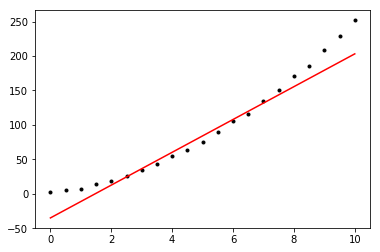

In [17]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, 23.82 * x - 35.106, 'r-')

Note how the points below the line are bunched in a specific $x$ range.

***

## Multi-linear regression

Let's try multi-linear regression using sklearn.
[https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

In [18]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [19]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [20]:
# Let's use pandas to read a csv file and organise our data.
import pandas as pd

In [21]:
# Read the iris csv from online.
df = pd.read_csv('https://datahub.io/machine-learning/iris/r/iris.csv')

$$ petalwidth = t (sepallength) + u (sepalwidth) + v (petallength) + c $$

In [22]:
# Let's pretend we want to do linear regression on these variables to predict petal width.
x = df[['sepallength', 'sepalwidth', 'petallength']]

In [23]:
# Here's petal width.
y = df['petalwidth']

In [24]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# Here's our intercept.
m.intercept_

-0.248723586024455

In [26]:
# Here's our coefficients, in order.
m.coef_

array([-0.21027133,  0.22877721,  0.52608818])

In [27]:
# See how good our fit is.
m.score(x, y)

0.9380481344518986

In [28]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['sepallength'] + u * x['sepalwidth'] + v * x['petallength'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

0.9380481344518986

***

## Using statsmodels

In [29]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           6.20e-88
Time:                        12:52:06   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2487      0.178     -1.396      

## End